<a href="https://colab.research.google.com/github/JuanYa1901/Evaluacion_4/blob/main/620454_Base_Entrega_Modelos_NO_Supervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega 4 - Modelos de segmentación

**Autor(es):**
- Integrante 1: Leonardo Bustos Vallejos

- Integrante 2: Javier Villena Novoa

- Integrante 3: Juan Javier Yáñez Romero

- Correo Electrónico: leonardo.bustos2001@alumnos.ubiobio.cl

- Correo Electrónico: javier.villena2101@alumnos.ubiobio.cl

- Correo Electrónico: juan.yanez1901@alumnos.ubiobio.cl

**Correo Electrónico:**

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción


Este notebook contiene el desarrollo de la evaluación 4 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería en Informática - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- pandas (2.2.2)
- matplotlib (3.10.0)
- seaborn (0.13.2)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [51]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv

--2025-07-11 03:27:37--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159876 (156K) [text/plain]
Saving to: ‘datos_segmentacion.csv.1’

datos_segmentacion. 100%[===================>] 156.13K  --.-KB/s    in 0.1s    

2025-07-11 03:27:37 (1.24 MB/s) - ‘datos_segmentacion.csv.1’ saved [159876/159876]



In [52]:
!pip install kneed

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import seaborn as sns
import mpl_toolkits.mplot3d as Axes3D

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

from kneed import KneeLocator

# Objetivos



## Contexto de Negocio para Segmentación

**Nombre del proyecto:** Segmentación de Usuarios de una App de Bienestar Integral

**Contexto:**
Una startup tecnológica ha desarrollado una aplicación móvil llamada **ViveFit**, orientada a mejorar el bienestar de las personas mediante el monitoreo de su actividad física y calidad del descanso.

A través de sensores y autodiagnóstico diario, la aplicación recolecta las siguientes variables continuas para cada usuario:

* `actividad_fisica`: horas promedio de ejercicio semanal.
* `pasos_diarios`: promedio de pasos diarios registrados.
* `calorias_gastadas`: estimación promedio de calorías quemadas por actividad.
* `horas_de_sueno`: promedio de horas de sueño nocturno.
* `nivel_descanso`: índice (numérico) que refleja cuán descansado se siente el usuario (basado en sueño y hábitos).

**Objetivo de análisis:**
La empresa desea **segmentar a sus usuarios** para personalizar recomendaciones, notificaciones y planes de entrenamiento. El equipo de analítica ha decidido aplicar técnicas de **reducción de dimensionalidad con PCA**, con el fin de visualizar la estructura de los datos y mejorar la calidad de segmentación.

---

## Actividades

### Modelo usando 2 variables
1. Justificar la selección de 2 variables **(5 puntos)**
2. Elegir la cantidad óptima de clusters **(3 puntos)**
3. Aplicar **KMeans** usando 2 variables y evaluar la calidad de los grupos generados. **(2 puntos)**
4. Visualizar los grupos generados mostrando los centroides de cada grupo. **(3 puntos)**
5. Mostrar los **centroides en escala original**. **(3 puntos)**
6. Interpretar un **centroide en escala original**. **(3 puntos)**
### Modelo usando 4 o más variables
7. Justificar la selección de las variables **(5 puntos)**
8. Elegir la cantidad óptima de clusters **(3 puntos)**
9. Aplicar **KMeans** usando las variables seleccionadas y evaluar la calidad de los grupos generados. **(2 puntos)**
10. Mostrar los **centroides en escala original**. **(3 puntos)**
11. Interpretar un **centroide en escala original**. **(3 puntos)**
12. **Aplicar PCA** sobre los datos escalados y argumentar cuántos componentes principales retendrán. **(5 puntos - 1 punto aplicar PCA y 4 por argumentar correctamente)**
13. Visualizar la **varianza explicada acumulada** para justificar la elección. **(2 puntos)**
14. Mostrar los **centroides en escala original**. **(3 puntos)**



---

## Penalizaciones
+ Ausencia de datos de autores - 10% de la calificación final
+ Falta de aplicación de buenas prácticas - 10% de la calificación final
* Faltas en redacción y ortografía - 10% de la calificación final

---


##Descripción de Datos


In [54]:
df = pd.read_csv("datos_segmentacion.csv")

df.shape

(5000, 5)

In [55]:
df.head()

,actividad_fisica,pasos_diarios,calorias_gastadas,horas_de_sueno,nivel_descanso
0,5.75,11278.26,2230.18,7.40,75.74
1,4.79,9358.50,1886.49,7.48,76.19
2,5.97,11045.24,2328.88,7.55,70.77
3,7.28,14404.04,2924.86,8.16,84.53
4,4.65,9663.95,1979.23,6.98,62.32


##Analisis preeliminar de los datos

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   actividad_fisica   5000 non-null   float64
 1   pasos_diarios      5000 non-null   float64
 2   calorias_gastadas  5000 non-null   float64
 3   horas_de_sueno     5000 non-null   float64
 4   nivel_descanso     5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


In [57]:
df.describe()

,actividad_fisica,pasos_diarios,calorias_gastadas,horas_de_sueno,nivel_descanso
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.008396,10011.868760,2004.416454,7.511548,75.023856
std,1.494725,3030.930957,605.897772,0.702341,8.428917
min,0.140000,-266.630000,44.960000,4.800000,43.940000
25%,4.010000,7974.792500,1597.297500,7.030000,69.520000
50%,5.020000,10017.085000,2009.215000,7.510000,75.115000
75%,6.000000,12028.565000,2396.437500,7.990000,80.720000
max,10.890000,21589.360000,4455.140000,10.640000,113.120000


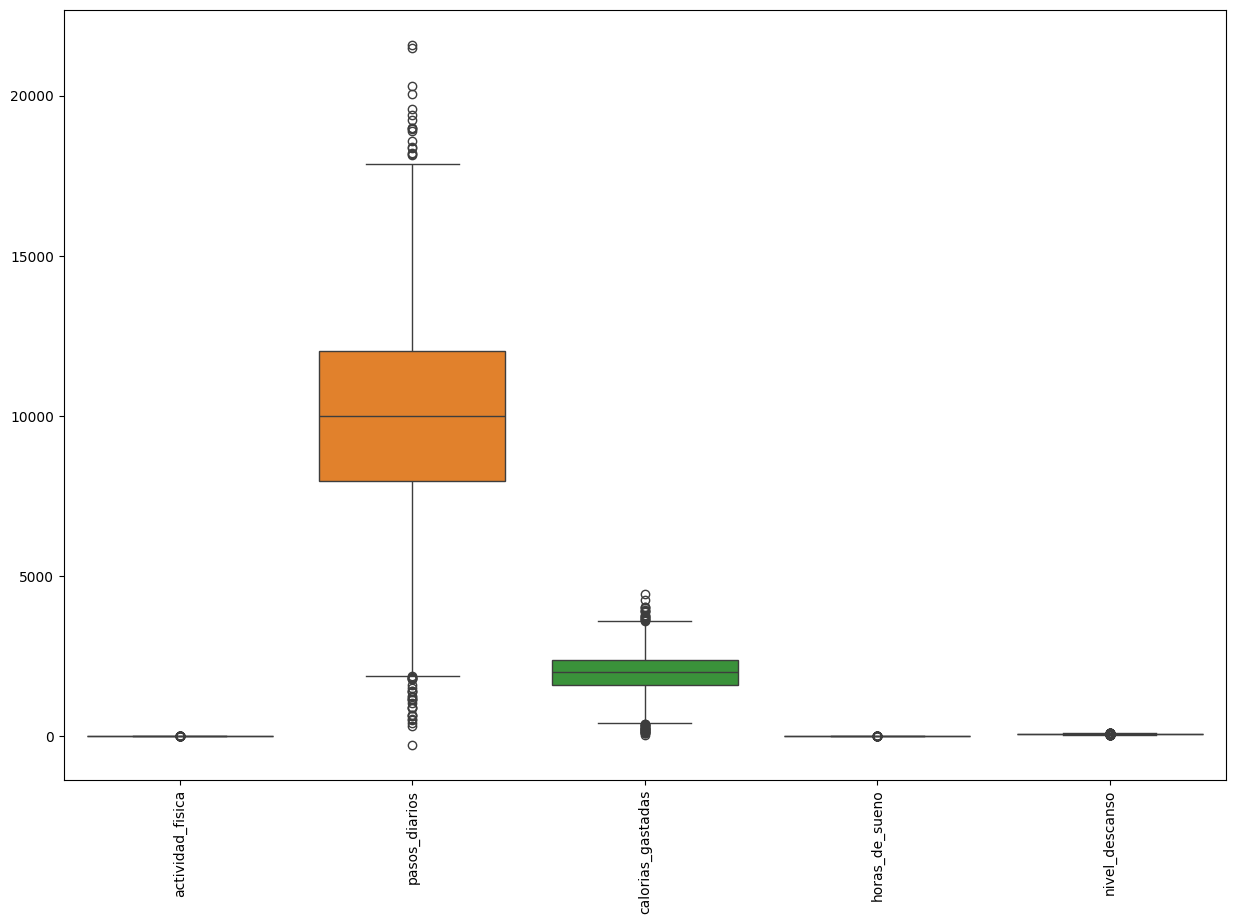

In [58]:
#Buscar existencia de atipcios

plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

## Modelo de segmentación usando 2 variables

### Selección y justificación de variables

**Variables a utilizar:**

- actividad_fisica
- nivel_descanso

Motivo:

In [59]:
# Escriba su código acá

La app ViveFit tiene como propósito mejorar el bienestar de los usuarios, estas dos variables son representativas del bienestar físico y mental, por lo que basado en estos aspectos, la empresa puede mejorar sus recomendaciones.

Ambas variables reflejan aspectos distintos, pero complementarios del bienestar; mientras la actividad física refleja esfuerzo, el nivel de descanso mide la recuperación del cliente, esta combinación da una idea equilibrada del estado del usuario, por lo que las recomendaciones pueden basarse en mejorar su calidad de vida dependiendo de su estado actual.

Si bien el resto de variables también miden aspectos importantes, al estar limitados en variables se consideró una aproximación mas general, este motivo también fue importante para inclinarse por las variables decididas.

### Elección del número de cluster óptimo

In [60]:
# Escriba su código acá
features = ['actividad_fisica', 'nivel_descanso']
df_simple = df[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_simple)

sse = []
for k in range(2, 21):
  kkmeans = KMeans(n_clusters=k, n_init="auto", random_state = 29).fit(X_scaled)
  sse.append(kkmeans.inertia_)
kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print("El SSE =", np.round(kl.all_elbows_y, 2))

El codo está en k = 6
El SSE = [2565.96]


### Creación y entrenamiento del modelo

In [61]:
# Escriba su código acá
# Primera aplicación de KMeans con las características seleccionadas
kmeans_x= KMeans(n_clusters=kl.elbow, n_init=10, random_state = 29)
grupos = kmeans_x.fit_predict(X_scaled)
df_simple['grupo'] = grupos


Visualizar los grupos generados mostrando los centroides de cada grupo.

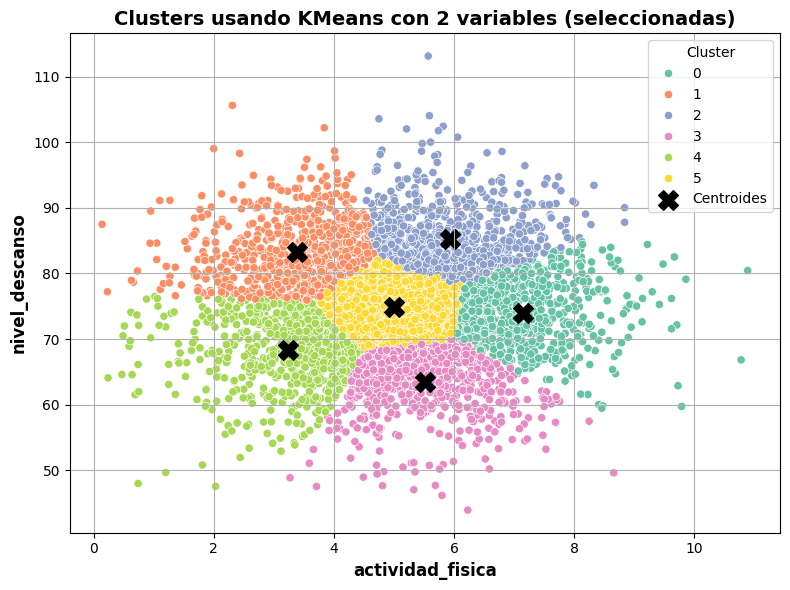

In [62]:
# Obtiene los centroides en escala original
centroides_escalados = kmeans_x.cluster_centers_
centroides_originales = scaler.inverse_transform(centroides_escalados)


# Gráfica de los grupos
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_simple, x='actividad_fisica', y='nivel_descanso', hue='grupo', palette='Set2')
plt.scatter(centroides_originales[:, 0], centroides_originales[:, 1],
            s=200, c='black', marker='X', label='Centroides')
plt.title("Clusters usando KMeans con 2 variables (seleccionadas)", fontsize=14, fontweight="bold")
plt.xlabel("actividad_fisica", fontsize=12, fontweight="bold")
plt.ylabel("nivel_descanso", fontsize=12, fontweight="bold")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
centroides_escalados = kmeans_x.cluster_centers_
centroides_originales = scaler.inverse_transform(centroides_escalados)

df_centroides = pd.DataFrame(centroides_originales, columns=features)
df_centroides['cluster'] = range(6)
df_centroides.set_index('cluster', inplace=True)
df_centroides = df_centroides.round(2)

display(df_centroides)

,actividad_fisica,nivel_descanso
cluster,,
0,7.15,73.92
1,3.39,83.19
2,5.93,85.25
3,5.51,63.39
4,3.23,68.36
5,5.00,74.94


### Evaluación del modelo

In [64]:
# Escriba su código acá
# Selección de variables

In [65]:
# Silhouette Score en espacio seleccionado
silhouette_simple= silhouette_score(X_scaled, grupos)
print(f"Silhouette Score (espacio seleccionado): {silhouette_simple:.4f}")

Silhouette Score (espacio seleccionado): 0.3235


## Modelo de segmentación usando 4 o más variables

### Selección de las variables

In [66]:
# Variables a utilizar:

# actividad_fisica
# nivel_descanso
# pasos_diarios
# calorias_gastadas

Estas cuatro variables representan comportamientos y estilo de vida del usuario, que es clave en la aplicación, ya que que están directamente asociadas al rendimiento físico, hábitos saludables y recuperación.

actividad_fisica y calorias_gastadas están relacionadas, pero no son iguales; es posible realizar más actividad física con diferente intensidad calórica dependiendo del tipo de ejercicio realizado.

pasos_diarios aporta una métrica más automática y objetiva de movimiento general.

nivel_descanso representa una percepción subjetiva de bienestar físico y mental.

Teniendo en cuenta estas variables, la empresa puede generar recomendaciones más acertadas dependiendo del individuo, este es el motivo por el cual se decidió no incluir la variable horas_de_sueno, ya que su efecto se encuentra representado en nivel_descanso (el cual ya considera cantidad y calidad del sueño).

### Selección de número de clusters óptimo

El codo está en k = 7
SSE: [10596.86  8044.25  6342.21  5361.2   4526.22  4027.12  3684.51  3286.32
  2953.98  2803.11  2564.75  2430.03  2271.09  2120.58  2042.17  1932.61
  1846.17  1752.85  1694.71]


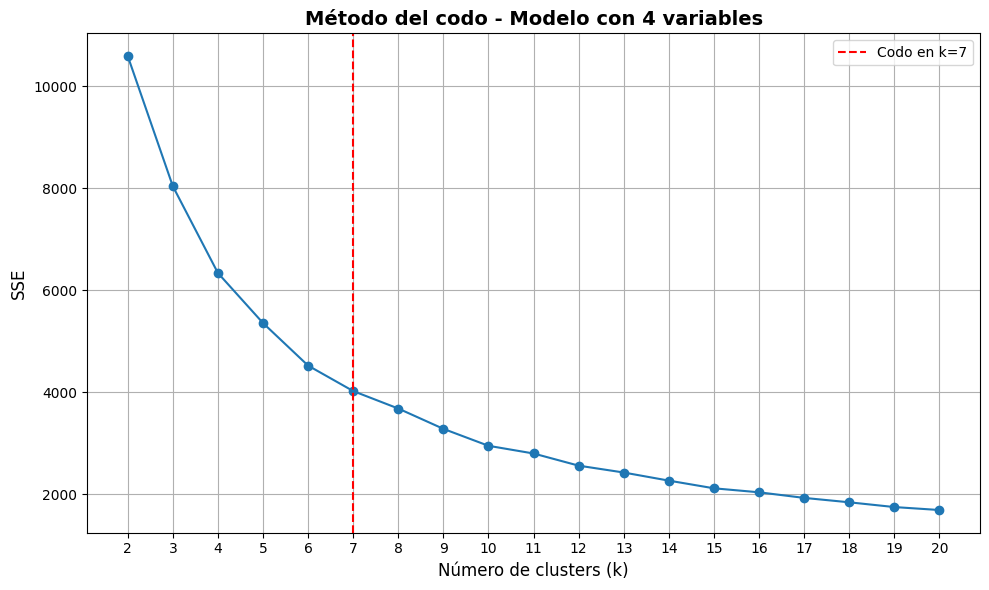

In [67]:
features_4v = ['actividad_fisica', 'pasos_diarios', 'calorias_gastadas', 'nivel_descanso']
df_4v = df[features_4v].copy()

# Escalamiento
scaler_4v = StandardScaler()
X_4v_scaled = scaler_4v.fit_transform(df_4v)

# Cálculo del SSE (Suma de los errores al cuadrado) para distintos valores de K
sse_4v = []
for k in range(2, 21):
    model = KMeans(n_clusters=k, n_init="auto", random_state=42).fit(X_4v_scaled)
    sse_4v.append(model.inertia_)

# Uso de KneeLocator para encontrar el "codo"
kl_4v = KneeLocator(range(2, 21), sse_4v, curve="convex", direction="decreasing")

# Resultados
print(f"El codo está en k = {kl_4v.elbow}")
print(f"SSE: {np.round(sse_4v, 2)}")

# Gráfico del método del codo con eje X corregido
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), sse_4v, marker='o')
plt.axvline(x=kl_4v.elbow, color='r', linestyle='--', label=f'Codo en k={kl_4v.elbow}')
plt.title("Método del codo - Modelo con 4 variables", fontsize=14, fontweight="bold")
plt.xlabel("Número de clusters (k)", fontsize=12)
plt.ylabel("SSE", fontsize=12)
plt.xticks(range(2, 21))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Creación y entrenamiento del modelo

*   Elemento de la lista
*   Elemento de la lista



In [68]:
# 1. Selección de variables
features_4_vars = ['actividad_fisica', 'pasos_diarios', 'calorias_gastadas', 'nivel_descanso']
X = df[features_4_vars].copy()

# 2. Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Entrenar modelo con k=7
kmeans_model = KMeans(n_clusters=7, n_init=10, random_state=29)
grupos = kmeans_model.fit_predict(X_scaled)
df_4v['grupo'] = grupos

# 4. Mostrar Silhouette Score
silhouette_valor = silhouette_score(X_scaled, grupos)
print(f"Silhouette Score (espacio con 4 variables): {silhouette_valor:.4f}")

# 5. Centroides en escala original
centroides_escalados = kmeans_model.cluster_centers_
centroides_originales = scaler.inverse_transform(centroides_escalados)

df_centroides = pd.DataFrame(centroides_originales, columns=features_4_vars)
df_centroides['cluster'] = range(7)
df_centroides.set_index('cluster', inplace=True)
df_centroides = df_centroides.round(2)

# Mostrar
display(df_centroides)

Silhouette Score (espacio con 4 variables): 0.2952


,actividad_fisica,pasos_diarios,calorias_gastadas,nivel_descanso
cluster,,,,
0,5.96,11924.21,2391.31,82.99
1,4.04,8045.32,1615.31,66.67
2,2.39,4713.33,948.68,74.07
3,4.98,9966.35,1991.10,75.27
4,7.56,15157.90,3031.72,75.77
5,3.87,7712.28,1543.41,83.44
6,6.01,12050.91,2408.31,66.55


El cluster 4 representa a los usuarios más activos físicamente y con el gasto calórico más alto del conjunto. En promedio,
Realizan más de 7.5 horas de actividad física semanal, lo que supera claramente al resto.
Caminan más de 15.000 pasos diarios, una cantidad elevada para un usuario promedio.
Su consumo calórico también es el más alto
Su nivel de descanso es adecuado, pero no el más alto, lo que podría sugerir que la alta actividad física no siempre se traduce en mayor descanso percibido.
Este grupo es ideal para recomendar planes intensivos, entrenamientos avanzados y rutinas de alto rendimiento.

### Evaluación del modelo

In [69]:
# Escriba su código acá

In [70]:
silhouette_valor = silhouette_score(X_scaled, grupos)
print(f"Silhouette Score (espacio con 4 variables): {silhouette_valor:.4f}")

Silhouette Score (espacio con 4 variables): 0.2952


### Aplicación de PCA

In [71]:
#Escriba su código acá

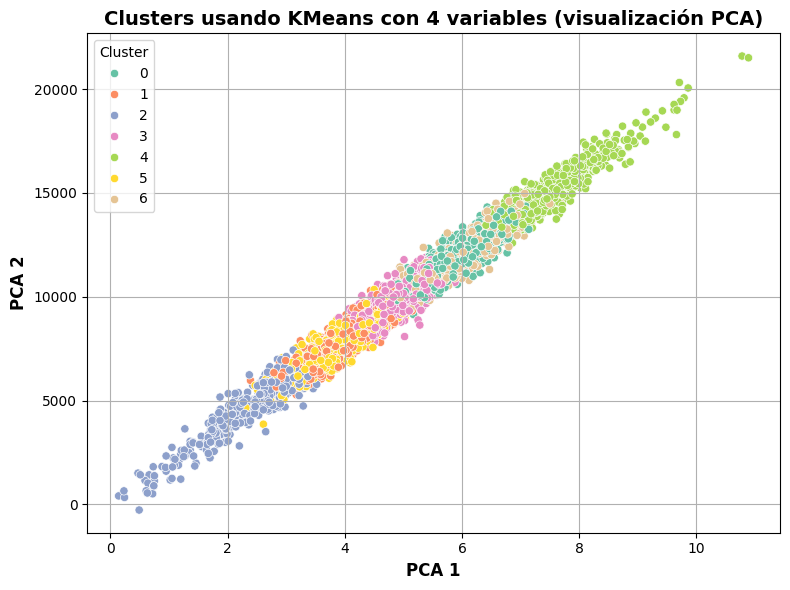

In [72]:
# Visualización usando PCA
# (sólo para graficar clusters originales, por esa razón el número de componentes es 2
pca_visual = PCA(n_components=2)
X_visual = pca_visual.fit_transform(X_scaled)
df_4v['PCA 1'] = X_visual[:, 0]
df_4v['PCA 2'] = X_visual[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_4v, x='actividad_fisica', y='pasos_diarios', hue='grupo', palette='Set2')

plt.title("Clusters usando KMeans con 4 variables (visualización PCA)", fontsize=14, fontweight="bold")
plt.xlabel("PCA 1", fontsize=12, fontweight="bold")
plt.ylabel("PCA 2", fontsize=12, fontweight="bold")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


Varianza explicada por cada componente:
Componente 1: 0.7409  |  Acumulada: 0.7409
Componente 2: 0.2499  |  Acumulada: 0.9908
Componente 3: 0.0069  |  Acumulada: 0.9977
Componente 4: 0.0023  |  Acumulada: 1.0000


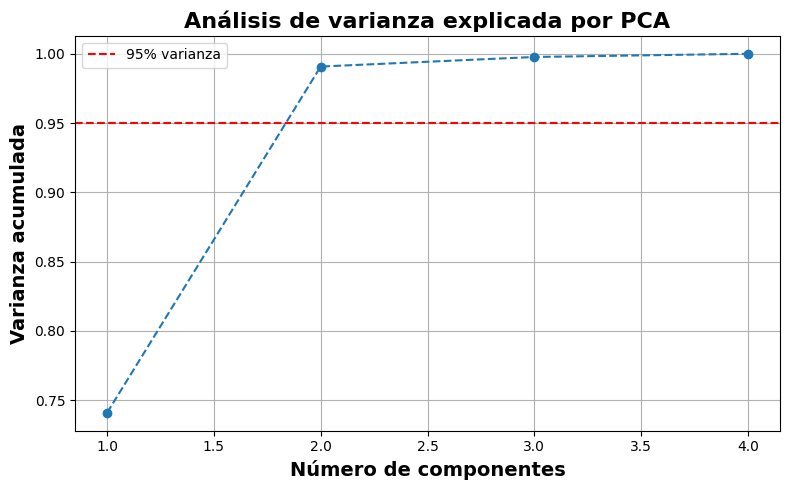


Número de componentes que explican >=95.0% de la varianza: 2


In [73]:
# Análisis de varianza explicada por PCA
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Varianza explicada por cada componente
varianza_explicada = pca_full.explained_variance_ratio_
varianza_explicada_acumulada = np.cumsum(varianza_explicada)

# Mostrar tabla con varianza explicada
print("\nVarianza explicada por cada componente:")
for i, (v_ind, v_acum) in enumerate(zip(varianza_explicada, varianza_explicada_acumulada), 1):
    print(f"Componente {i}: {v_ind:.4f}  |  Acumulada: {v_acum:.4f}")

# Visualizar varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada_acumulada, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.xlabel('Número de componentes', fontsize=14, fontweight="bold")
plt.ylabel('Varianza acumulada', fontsize=14, fontweight="bold")
plt.title('Análisis de varianza explicada por PCA', fontsize=16, fontweight="bold")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Elegir número óptimo de componentes (>= 95% varianza)
umbral = 0.95
n_componentes_optimos = np.argmax(varianza_explicada_acumulada >= umbral) + 1
print(f"\nNúmero de componentes que explican >={umbral*100}% de la varianza: {n_componentes_optimos}")